#knn의 다중분류
- iris dataset(붓꽃)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


###데이터 준비

In [45]:
iris= pd.read_csv('iris.csv')
iris.shape

(150, 6)

In [46]:
iris.head()
df= iris.copy()

In [47]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [48]:
df.isna().sum(axis=0)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

###데이터 분리

In [49]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [50]:
# 테스트 데이터 준비
x= df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y= df['Species']

# 날리고 싶으면 --> df.drop(['id','Species'], axis=1) 요렇게

In [51]:
x.shape, y.shape

((150, 4), (150,))

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state= 32190403)

In [53]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [54]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
93,5.0,2.3,3.3,1.0
139,6.9,3.1,5.4,2.1
11,4.8,3.4,1.6,0.2
26,5.0,3.4,1.6,0.4
64,5.6,2.9,3.6,1.3


In [55]:
y_train.head()

93     Iris-versicolor
139     Iris-virginica
11         Iris-setosa
26         Iris-setosa
64     Iris-versicolor
Name: Species, dtype: object

####scailing
- 표준화

In [56]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)

StandardScaler()

In [57]:
x_train_s= ss.transform(x_train)

In [58]:
ss.mean_

array([5.86916667, 3.03666667, 3.86833333, 1.24583333])

In [59]:
ss.var_

array([0.71529931, 0.18115556, 3.07116389, 0.57164931])

In [60]:
x_test_s= ss.transform(x_test)

#####라벨 인코딩

In [61]:

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [62]:
y_train= le.transform(y_train)

In [63]:
y_test = le.transform(y_test)
y_test

array([0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 0, 0])

###3.학습

In [64]:
from sklearn. neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train_s, y_train)

KNeighborsClassifier()

In [67]:
x_test_s= ss.transform(x_test)
x_test_s

array([[-1.26415844,  0.85364915, -1.12317428, -1.38324032],
       [-0.55473204,  1.55849708, -1.35142308, -1.38324032],
       [-0.55473204,  2.0283957 , -1.46554748, -1.11871627],
       [ 0.98235851, -0.08614808,  0.64575388,  0.60069002],
       [-1.26415844, -0.08614808, -1.40848528, -1.2509783 ],
       [-0.4364943 , -1.02594531,  0.30338069, -0.06062009],
       [ 1.21883398,  0.38375054,  1.04518928,  1.39426216],
       [ 0.98235851,  0.14880123,  0.98812708,  1.52652418],
       [ 0.15469437,  0.85364915,  0.36044289,  0.468428  ],
       [-0.90944524,  0.85364915, -1.35142308, -1.38324032],
       [-0.4364943 ,  2.73324362, -1.40848528, -1.38324032],
       [-1.02768297,  1.32354777, -1.40848528, -1.38324032],
       [-0.4364943 , -1.26089462,  0.0751319 ,  0.07164193],
       [ 0.2729321 , -0.32109739,  0.47456729,  0.20390395],
       [ 0.39116984, -1.96574255,  0.36044289,  0.33616597],
       [ 0.86412077, -0.08614808,  0.30338069,  0.20390395],
       [-0.90944524,  1.

In [69]:
y_test

array([0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 0, 0])

In [70]:
y_pred= clf.predict(x_test_s)
y_pred

array([0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1,
       1, 1, 2, 2, 1, 1, 0, 0])

In [71]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[13,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  5]])

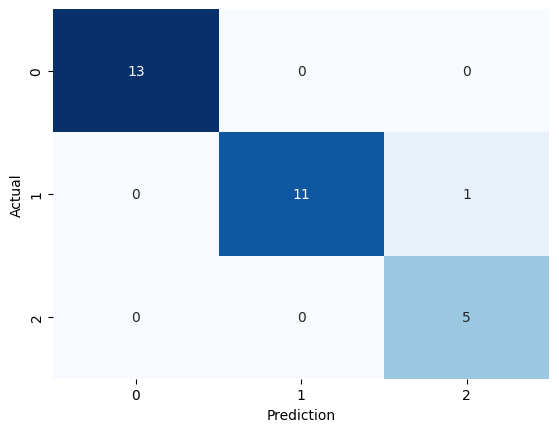

In [74]:
s= sns.heatmap(cfm,annot= True, cmap= 'Blues',fmt= 'd', cbar= False)
s.set(xlabel= 'Prediction', ylabel= 'Actual')
plt.show()

In [ ]:
s= sns.heatmap(cfm,annot= True, cmap= 'Blues',fmt= 'd', cbar= False)
s.set(xlabel= 'Prediction', ylabel= 'Actual')
plt.show()
# for문으로 만들어놓기

In [82]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def print_metrics(y_test, y_pred):
  acc= accuracy_score(y_test, y_pred)
  re= recall_score(y_test, y_pred, average='macro')
  pr= precision_score(y_test, y_pred, average='macro')
  f1= f1_score(y_test, y_pred, average='macro')

  print('정확도:', acc)
  print('재현율', np.around(re,4))
  print('정밀도:', np.around(pr,4))
  print('f1:',np.around(f1,4))

In [83]:
print_metrics(y_test,y_pred)

정확도: 0.9666666666666667
재현율 0.9722
정밀도: 0.9444
f1: 0.9552


###4.튜닝
- k값을 3으로 학습 및 평가

In [84]:
scores = []

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
acc= accuracy_score(y_test, y_pred)
scores.append(acc)

In [86]:
scores

[1.0]

In [87]:
# 베스트모델(k 재학습)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

clf.predict()

TypeError: ignored